In [70]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Load the Datasets
titanic_train=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\15.XGBM & LGBM\\Titanic_train.csv")
titanic_test=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\15.XGBM & LGBM\\Titanic_test.csv")

In [80]:
# Combining the datasets
titanic=[titanic_train,titanic_test]

In [90]:
# Read the Combined Dataset
titanic_df=pd.concat(titanic)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [92]:
# Remove Unnecessary Columns
titanic_df=titanic_df.drop(['PassengerId'],axis=1)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [94]:
# Summary of Dataset
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [96]:
# Explore the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [98]:
# Missing Values
titanic_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

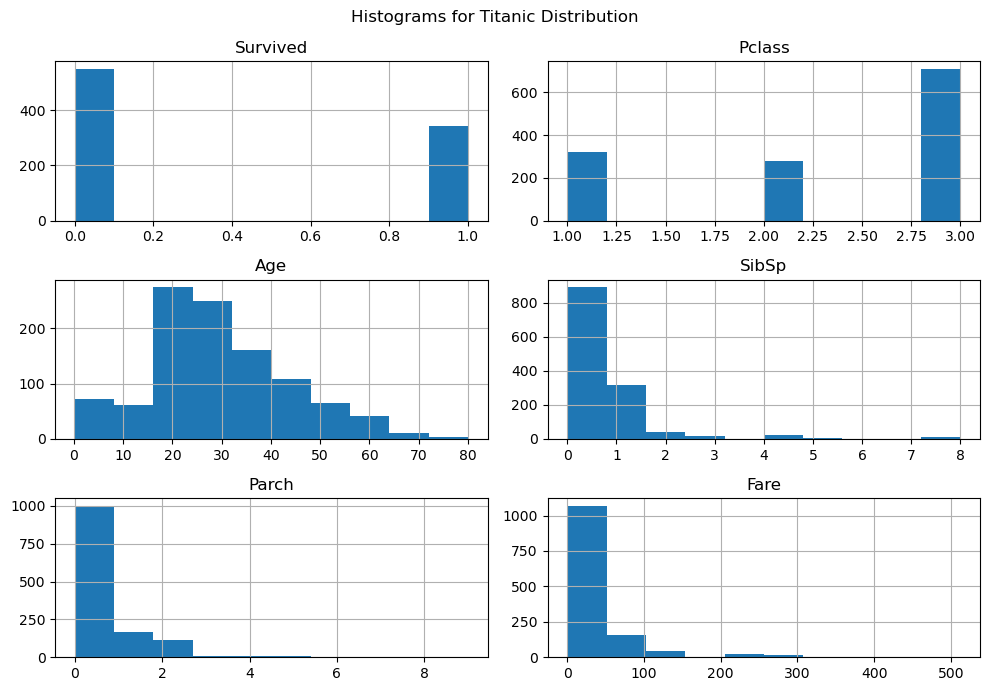

In [100]:
# Histograms
titanic_df.hist(figsize=(10,7))
plt.suptitle('Histograms for Titanic Distribution')
plt.tight_layout()
plt.show()

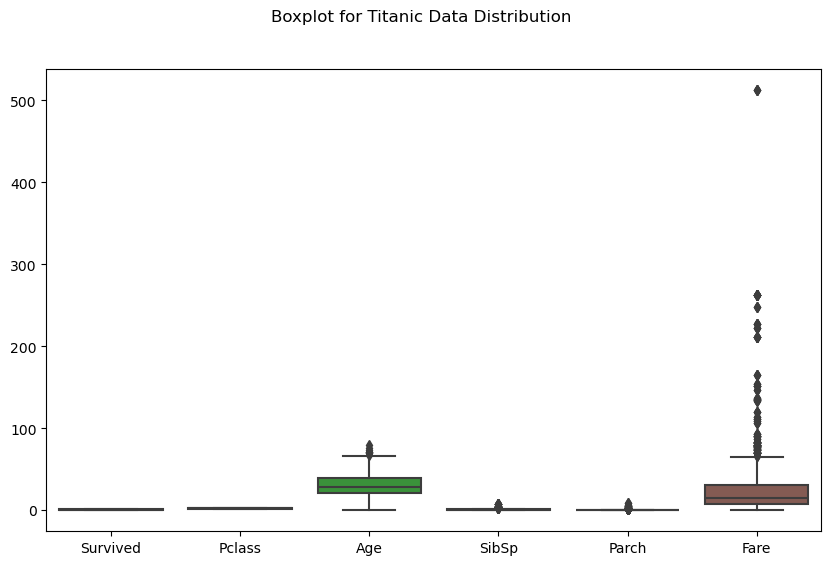

In [102]:
# Boxplot
plt.figure(figsize=(10,6))
plt.suptitle("Boxplot for Titanic Data Distribution")
sns.boxplot(titanic_df)
plt.show()

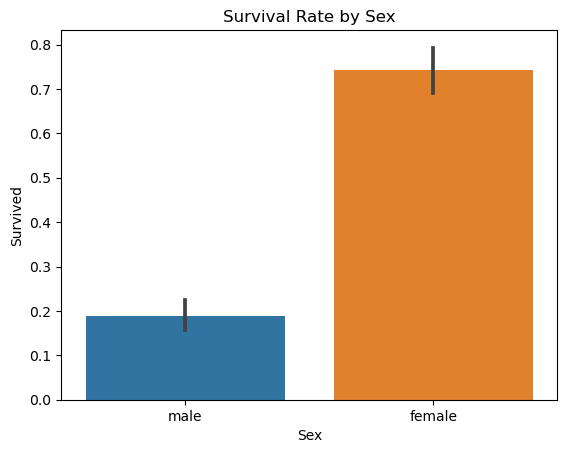

In [104]:
# Bar plot for survival by sex
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.show()

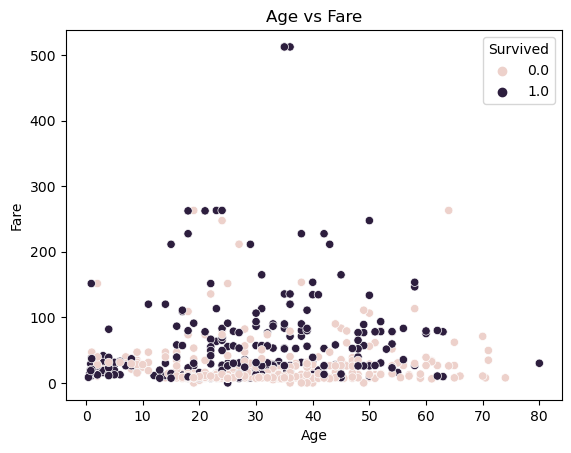

In [106]:
# Scatter plot for Age and Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [108]:
# Impute missing values
titanic_df['Survived'].fillna(titanic_df['Survived'].median(), inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [110]:
# One-hot encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,1,0,1
414,0.0,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0
415,0.0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1
416,0.0,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,1,0,1


In [112]:
# Drop Irrelevant features
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
#Import Library
from sklearn.model_selection import train_test_split

In [116]:
# Split the dataset into features and target variable
x = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [118]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [122]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [124]:
# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


LGBMClassifier()

In [126]:
# Make predictions for LightGBM
lgb_preds = lgb_model.predict(x_test)
lgb_preds

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [128]:
# Evaluate models for LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_preds)
lgb_precision = precision_score(y_test, lgb_preds)
lgb_recall = recall_score(y_test, lgb_preds)
lgb_f1 = f1_score(y_test, lgb_preds)

In [130]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [132]:
# Make predictions for XGBoost
xgb_preds = xgb_model.predict(x_test)
xgb_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [134]:
# Evaluate models for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

In [136]:
# Output performance metrics for both LightGBM and XGBoost
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'LightGBM': [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})
metrics

,Metric,LightGBM,XGBoost
0,Accuracy,0.721374,0.717557
1,Precision,0.500000,0.492754
2,Recall,0.479452,0.465753
3,F1-score,0.489510,0.478873


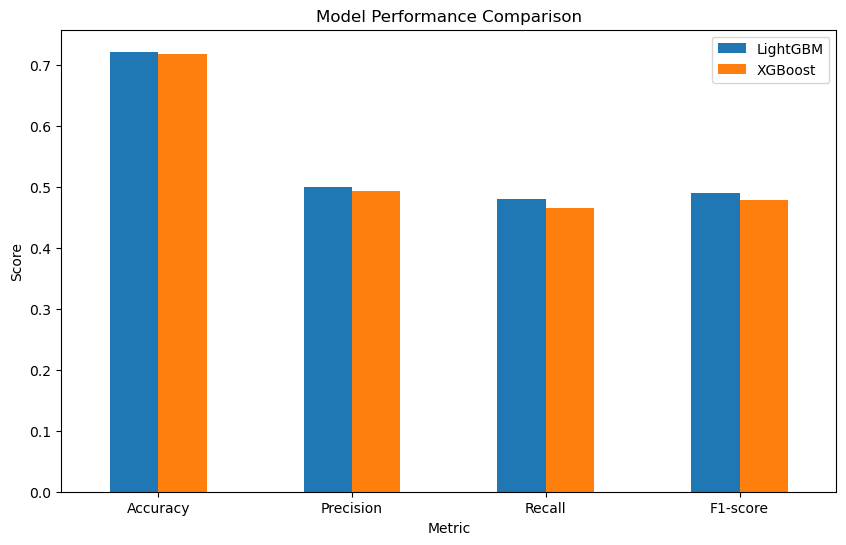

In [138]:
# Visualization of model performance
metrics.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Summary Report:

Metrics:

LightGBM: 

Accuracy:0.721374 ,  Precision:0.500000 ,  Recall:0.479452  , F1-score:0.489510

XGBoost:

Accuracy:0.717557  , Precision:0.492754  , Recall:0.465753 ,  F1-score:0.478873
GBoost.

Strengths and Weaknesses:

LightGBM might perform better in terms of speed due to its histogram-based algorithm.

XGBoost might provide better generalization on small datasets.

Practical Implications: Depending on the business context (e.g., real-time predictions), choose the model that balances accuracy and speed.